# **Halloween Candy Popularity and Affordability Analysis**

In this project, I analyse various types of Halloween candies to identify the most popular and affordable ones.
Using Principal Component Analysis (PCA) and K-Means clustering, I explore the relationships between candy features 
like chocolate, fruity, and nutty characteristics. I calculate a 'popular_vs_cheap' score to highlight the candies 
that offer the best combination of high popularity and low cost.

The project includes:
1. Data preparation and cleaning.
2. Feature extraction using PCA to reduce dimensionality.
3. K-Means clustering to group similar candies into meaningful categories.
4. Visualisation of results through heatmaps, scatter plots (with jitter), and a PowerPoint-style presentation to 
   highlight the findings.

The end goal is to help people choose the best Halloween candies for kids while keeping costs low, 
all presented in a fun and engaging way.

In [1]:
# Import necessary modules for data preparation and EDA

import pandas as pd  # Pandas for data manipulation and DataFrame management
import numpy as np   # NumPy for numerical operations and handling arrays
import seaborn as sns  # Seaborn for data visualization, especially for statistical plots
import matplotlib.pyplot as plt  # Matplotlib for creating static, interactive, and animated visualizations

In [2]:
# Load the candy dataset from a CSV file into a DataFrame
candy_df = pd.read_csv('candy-data.csv')

# Display the first few rows of the DataFrame to inspect the data
candy_df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
# Create a copy of the candy_df DataFrame to avoid modifying the original dataset
df = candy_df.copy()

In [4]:
# Create a new column 'popular_vs_cheap' to calculate a score based on popularity and affordability
# I use np.where to apply the condition where the score is only calculated for candies with a winpercent > 50
# If winpercent is greater than 50, I calculate (1 - pricepercent) * winpercent, which prioritizes cheap and popular candies
# Otherwise, I set the score to 0 for candies with a winpercent <= 50 (to exclude unpopular candies)

df['popular_vs_cheap'] = np.where(
                                df.winpercent > 50.0,  
                                (1 - df.pricepercent) * df.winpercent, 
                                0  
)

In [5]:
# Create a new column 'price_range' to categorise the prices based on 'pricepercent'
# Use np.where to assign price categories based on the specified thresholds:
# If 'pricepercent' is less than 0.25, assign 'Very Low'
# If 'pricepercent' is less than 0.50 (and greater than or equal to 0.25), assign 'Low'
# If 'pricepercent' is less than 0.75 (and greater than or equal to 0.50), assign 'Medium'
# Otherwise, assign 'High' for 'pricepercent' values of 0.75 and above

df['price_range'] = np.where(df.pricepercent < 0.25, 'Very Low',
                             np.where(df.pricepercent < 0.50, 'Low',
                                      np.where(df.pricepercent < 0.75, 'Medium',
                                               'High')))

In [6]:
# Rename the columns 'peanutyalmondy' to 'nutty' and 'crispedricewafer' to 'crisped' for easier reference
df = df.rename(columns={'peanutyalmondy': 'nutty', 'crispedricewafer': 'crisped'})

# Display the first few rows of the updated DataFrame to check the new column names
df.head()

,competitorname,chocolate,fruity,caramel,nutty,nougat,crisped,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,popular_vs_cheap,price_range
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,9.376041,High
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,33.057837,Medium
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0.000000,Very Low
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0.000000,Medium
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,25.594977,Medium


In [7]:
# Get the dimensions of the DataFrame (number of rows and columns)
df.shape

(85, 15)

In [8]:
# Filter the DataFrame to include only rows where 'popular_vs_cheap' is not equal to 0 (i.e., popular candies)
# Reset the index after filtering and drop the old index column
popular_df = df[df.popular_vs_cheap != 0].reset_index(drop=True)

# Display the first few rows of the filtered DataFrame to inspect the popular candies
popular_df.head()

,competitorname,chocolate,fruity,caramel,nutty,nougat,crisped,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,popular_vs_cheap,price_range
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,9.376041,High
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,33.057837,Medium
2,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,25.594977,Medium
3,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,11.730977,High
4,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,13.261088,High


In [9]:
# Get the dimensions of the DataFrame (number of rows and columns)
popular_df.shape

(39, 15)

In [10]:
# Select all columns from the 'popular_df' DataFrame except the first column and the last 4 columns
model_df = popular_df.iloc[:, 1:-4]

In [11]:
# Center the data by subtracting the mean of each column from the corresponding values
model_df_centered = model_df - model_df.mean()

In [12]:
# Display summary statistics of the centered DataFrame
# This includes measures such as mean (which should now be close to 0), standard deviation, min, max, etc.
model_df_centered.describe()

,chocolate,fruity,caramel,nutty,nougat,crisped,hard,bar,pluribus,sugarpercent
count,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01
mean,-1.423363e-17,1.423363e-17,2.277381e-17,-1.708035e-17,1.138690e-17,-5.693451e-18,-1.245442e-18,-5.693451e-18,-5.693451e-18,6.262797e-17
std,4.558808e-01,4.558808e-01,4.423590e-01,4.675719e-01,3.386884e-01,3.655178e-01,1.601282e-01,5.023561e-01,5.023561e-01,2.726609e-01
min,-7.179487e-01,-2.820513e-01,-2.564103e-01,-3.076923e-01,-1.282051e-01,-1.538462e-01,-2.564103e-02,-4.358974e-01,-4.358974e-01,-5.003077e-01
25%,-7.179487e-01,-2.820513e-01,-2.564103e-01,-3.076923e-01,-1.282051e-01,-1.538462e-01,-2.564103e-02,-4.358974e-01,-4.358974e-01,-2.213077e-01
50%,2.820513e-01,-2.820513e-01,-2.564103e-01,-3.076923e-01,-1.282051e-01,-1.538462e-01,-2.564103e-02,-4.358974e-01,-4.358974e-01,1.169232e-02
75%,2.820513e-01,7.179487e-01,2.435897e-01,6.923077e-01,-1.282051e-01,-1.538462e-01,-2.564103e-02,5.641026e-01,5.641026e-01,1.976923e-01
max,2.820513e-01,7.179487e-01,7.435897e-01,6.923077e-01,8.717949e-01,8.461538e-01,9.743590e-01,5.641026e-01,5.641026e-01,4.536923e-01


In [13]:
# Import the PCA (Principal Component Analysis) class from scikit-learn for dimensionality reduction
from sklearn.decomposition import PCA

In [14]:
# Initialize the PCA model to reduce the dataset to 2 principal components
pca = PCA(n_components=2)

# Fit the PCA model on the centered data to calculate the principal components
pca.fit(model_df_centered)

PCA(n_components=2)

In [15]:
# View the total explained variance ratio by summing the explained variance of the two principal components
# This tells how much variance in the data is captured by the two principal components
sum(pca.explained_variance_ratio_)

# The explained variance ratio (EVR) is approximately 0.662, meaning 66.2% of the total variance is captured by the two components

np.float64(0.6328453758483353)

In [16]:
# Create a DataFrame to store the principal components, with columns named after the original features
# 'pca.components_' contains the principal axes in feature space, representing the directions of maximum variance
pca_df = pd.DataFrame(pca.components_, columns=model_df_centered.columns)

# Display the DataFrame containing the principal components
pca_df

,chocolate,fruity,caramel,nutty,nougat,crisped,hard,bar,pluribus,sugarpercent
0,0.440267,-0.440267,0.269119,0.198473,0.167954,0.177206,-0.043801,0.482371,-0.453334,0.028129
1,0.302369,-0.302369,-0.277512,0.692803,-0.126485,-0.285578,-0.027032,-0.351560,0.194777,-0.018429


**PC1:** has higher values for chocolate and single bars, and lower values for fruity and bagged candies.
* Interpretation: <--- fruity, bag                  choc, single --->

**PC2:** has higher values for bagged, chocolate, and nutty candies, and lower values for hard and fruity candies.
* Interpretation: <--- choc, nutty, bag            fruity, hard --->

In [17]:
# Transform the centered data using PCA and store the first two principal components in a new DataFrame
pca_df = pd.DataFrame(
    pca.transform(model_df_centered),  # Apply the PCA transformation to the centered data
    columns=['pc1', 'pc2']  # Name the resulting components as 'pc1' and 'pc2'
)

# Define the jitter strength, which controls the amount of random noise added to the data
jitter_strength = 0.01  # This value can be adjusted for more or less jitter

# Add jitter (random noise) to each of the PCA components ('pc1', 'pc2')
# This helps to avoid overlapping points in visualizations
pca_df['pc1_jitter'] = pca_df['pc1'] + np.random.normal(0, jitter_strength, size=len(pca_df))
pca_df['pc2_jitter'] = pca_df['pc2'] + np.random.normal(0, jitter_strength, size=len(pca_df))

# Display the first few rows of the jittered DataFrame to inspect the newly added columns
pca_df[['pc1_jitter', 'pc2_jitter']].head()

# Show the full DataFrame with the original PCA components and their jittered counterparts
pca_df.head()

,pc1,pc2,pc1_jitter,pc2_jitter
0,0.992210,-0.760554,0.995902,-0.753520
1,0.710239,-0.321590,0.717852,-0.317671
2,-0.812125,-0.453849,-0.837894,-0.455208
3,0.736848,0.500260,0.750075,0.517691
4,1.177830,0.093701,1.182355,0.098602


In [18]:
# Get the dimensions of the DataFrame (number of rows and columns)
pca_df.shape

(39, 4)

In [19]:
# Get the dimensions of the DataFrame (number of rows and columns)
popular_df.shape

(39, 15)

In [20]:
# Concatenate the original 'popular_df' DataFrame with the 'pca_df' (which contains the PCA components and their jitter)
# The concatenation is done along the columns (axis=1) to add 'pc1', 'pc2', 'pc1_jitter', and 'pc2_jitter' to 'popular_df'
popular_df = pd.concat([popular_df, pca_df], axis=1)

# Display the first few rows of the updated 'popular_df' to inspect the added PCA components and jitter columns
popular_df.head()

,competitorname,chocolate,fruity,caramel,nutty,nougat,crisped,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,popular_vs_cheap,price_range,pc1,pc2,pc1_jitter,pc2_jitter
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,9.376041,High,0.992210,-0.760554,0.995902,-0.753520
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,33.057837,Medium,0.710239,-0.321590,0.717852,-0.317671
2,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,25.594977,Medium,-0.812125,-0.453849,-0.837894,-0.455208
3,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,11.730977,High,0.736848,0.500260,0.750075,0.517691
4,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,13.261088,High,1.177830,0.093701,1.182355,0.098602


In [21]:
# Import the KMeans class from scikit-learn for performing K-Means clustering
from sklearn.cluster import KMeans

In [22]:
# Initialize the KMeans model with 3 clusters, auto initialization, and a fixed random state for reproducibility
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)

# Fit the KMeans model to the centered data to form 3 clusters based on the input features
kmeans.fit(model_df_centered)

KMeans(n_clusters=3, random_state=42)

In [23]:
# Create a DataFrame with the cluster labels assigned by the KMeans model
# Each data point is assigned to one of the 3 clusters
labels_df = pd.DataFrame(kmeans.labels_, columns=['cluster_label'])

# Create a DataFrame containing the coordinates of the cluster centroids
# Each centroid corresponds to the center of a cluster in the feature space
centroids_df = pd.DataFrame(kmeans.cluster_centers_, columns=model_df_centered.columns)

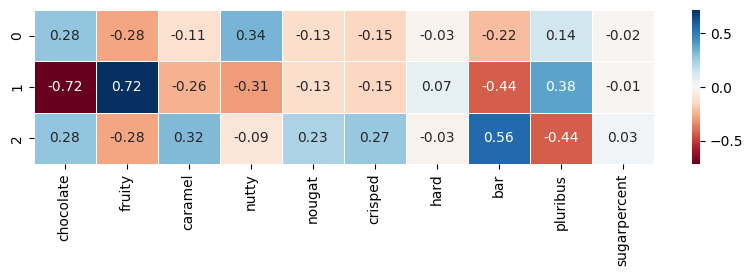

In [24]:
# Create a figure with a specific size to plot the heatmap of the cluster centroids
plt.figure(figsize=(10, 2))

# Create a heatmap to visualize the cluster centroids
# 'centroids_df' contains the centroid coordinates for each feature, showing how each cluster behaves
# 'annot=True' displays the values inside the heatmap cells
# 'cmap=RdBu' uses a red-blue color scale to represent the values
# 'fmt=.2f' formats the annotations to 2 decimal places
# 'linewidths=0.5' adds light borders between cells
sns.heatmap(
    centroids_df,
    annot=True,
    cmap='RdBu',
    fmt='.2f',
    linewidths=0.5
)

# Display the heatmap
plt.show()

* cluster 0: chocolate nutty sweets
* cluster 1: fruity bags
* cluster 2: chocolate flavoured bars

In [25]:
# Concatenate the 'popular_df' DataFrame with the 'labels_df' containing the cluster labels
# This adds the 'cluster_label' column to 'popular_df', showing the cluster assignment for each data point
popular_df = pd.concat([popular_df, labels_df], axis=1)

# Display the first few rows of the updated DataFrame to inspect the added 'cluster_label' column
popular_df.head()

,competitorname,chocolate,fruity,caramel,nutty,nougat,crisped,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,popular_vs_cheap,price_range,pc1,pc2,pc1_jitter,pc2_jitter,cluster_label
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,9.376041,High,0.992210,-0.760554,0.995902,-0.753520,2
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,33.057837,Medium,0.710239,-0.321590,0.717852,-0.317671,2
2,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,25.594977,Medium,-0.812125,-0.453849,-0.837894,-0.455208,1
3,Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,11.730977,High,0.736848,0.500260,0.750075,0.517691,0
4,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,13.261088,High,1.177830,0.093701,1.182355,0.098602,2


In [26]:
# Create a new column 'cluster_name' based on the cluster labels
# Use np.where to assign meaningful names to each cluster:
# If cluster_label is 0, assign 'chocolate nutty sweets'
# If cluster_label is 1, assign 'fruity bags'
# Otherwise, assign 'chocolate flavoured bars' (for cluster_label 2)

popular_df['cluster_name'] = np.where(popular_df.cluster_label == 0, 'chocolate nutty sweets',
                        np.where(popular_df.cluster_label == 1 , 'fruity bags',
                        'chocolate flavoured bars'))

In [27]:
# Display the first few rows of the updated DataFrame
popular_df.head()

,competitorname,chocolate,fruity,caramel,nutty,nougat,crisped,hard,bar,pluribus,...,pricepercent,winpercent,popular_vs_cheap,price_range,pc1,pc2,pc1_jitter,pc2_jitter,cluster_label,cluster_name
0,100 Grand,1,0,1,0,0,1,0,1,0,...,0.860,66.971725,9.376041,High,0.992210,-0.760554,0.995902,-0.753520,2,chocolate flavoured bars
1,3 Musketeers,1,0,0,0,1,0,0,1,0,...,0.511,67.602936,33.057837,Medium,0.710239,-0.321590,0.717852,-0.317671,2,chocolate flavoured bars
2,Air Heads,0,1,0,0,0,0,0,0,0,...,0.511,52.341465,25.594977,Medium,-0.812125,-0.453849,-0.837894,-0.455208,1,fruity bags
3,Almond Joy,1,0,0,1,0,0,0,1,0,...,0.767,50.347546,11.730977,High,0.736848,0.500260,0.750075,0.517691,0,chocolate nutty sweets
4,Baby Ruth,1,0,1,1,1,0,0,1,0,...,0.767,56.914547,13.261088,High,1.177830,0.093701,1.182355,0.098602,2,chocolate flavoured bars


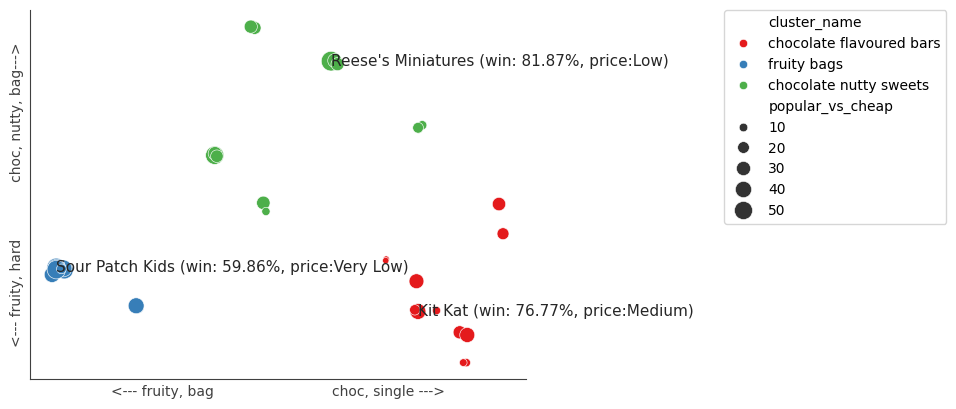

In [28]:
# Find the highest 'popular_vs_cheap' value in each cluster
max_popular_idx = popular_df.groupby('cluster_name')['popular_vs_cheap'].idxmax()

# Filter the DataFrame to only include the points with the highest 'popular_vs_cheap' in each cluster
max_popular_df = popular_df.loc[max_popular_idx]

# Create the scatter plot with variable bubble size based on 'popular_vs_cheap'
scatter = sns.scatterplot(
    x='pc1_jitter',
    y='pc2_jitter',
    data=popular_df,  # Use the full DataFrame to show all points
    hue='cluster_name',  # Use the cluster labels for coloring
    size='popular_vs_cheap',  # Bubble size based on 'popular_vs_cheap'
    sizes=(20, 200),  # Set the range of bubble sizes
    palette='Set1',  # Color palette for clusters
)

# Customize axis labels and set their color to grey
plt.xlabel('<--- fruity, bag                           choc, single --->', fontsize=10, color='#7f7f7f')
plt.ylabel('<--- fruity, hard             choc, nutty, bag--->', fontsize=10, color='#7f7f7f')

# Remove tick labels but keep axis descriptions and set tick color to grey
plt.xticks([], color='#404040')  # Hide x-axis tick values, but set the tick color to grey
plt.yticks([], color='#404040')  # Hide y-axis tick values, but set the tick color to grey

# Add candy names and popularity for the points with the highest 'popular_vs_cheap' in each cluster
for i in range(max_popular_df.shape[0]):
    plt.text(
        max_popular_df['pc1_jitter'].iloc[i], 
        max_popular_df['pc2_jitter'].iloc[i], 
        f"{max_popular_df['competitorname'].iloc[i]} (win: {max_popular_df['winpercent'].iloc[i]:.2f}%, price:{max_popular_df['price_range'].iloc[i]})",  # Candy name and popularity in parentheses
        fontsize=11, 
        ha='left',  # Align text to the left of each point
        va='center',  # Vertically align in the center
        color='#262626'  # Set text color to grey
    )

# Move the legend outside the plot
# This needs to be outside the plt.text() block, as plt.text() doesn't take a legend argument
plt.legend(bbox_to_anchor=(1.4, 1), loc='upper left', borderaxespad=0.)

# Remove top and right border
sns.despine()

# Set the tick and axis spine color to grey
ax = plt.gca()  # Get the current axes
ax.spines['bottom'].set_color('#404040')  # Set the bottom spine color to grey
ax.spines['left'].set_color('#404040')    # Set the left spine color to grey

# Set the axis tick labels and fonts to grey
ax.xaxis.label.set_color('#404040')
ax.yaxis.label.set_color('#404040')

# Set the size and color of the ticks to grey
ax.tick_params(axis='x', colors='#404040')
ax.tick_params(axis='y', colors='#404040')

# Show the plot
plt.show()


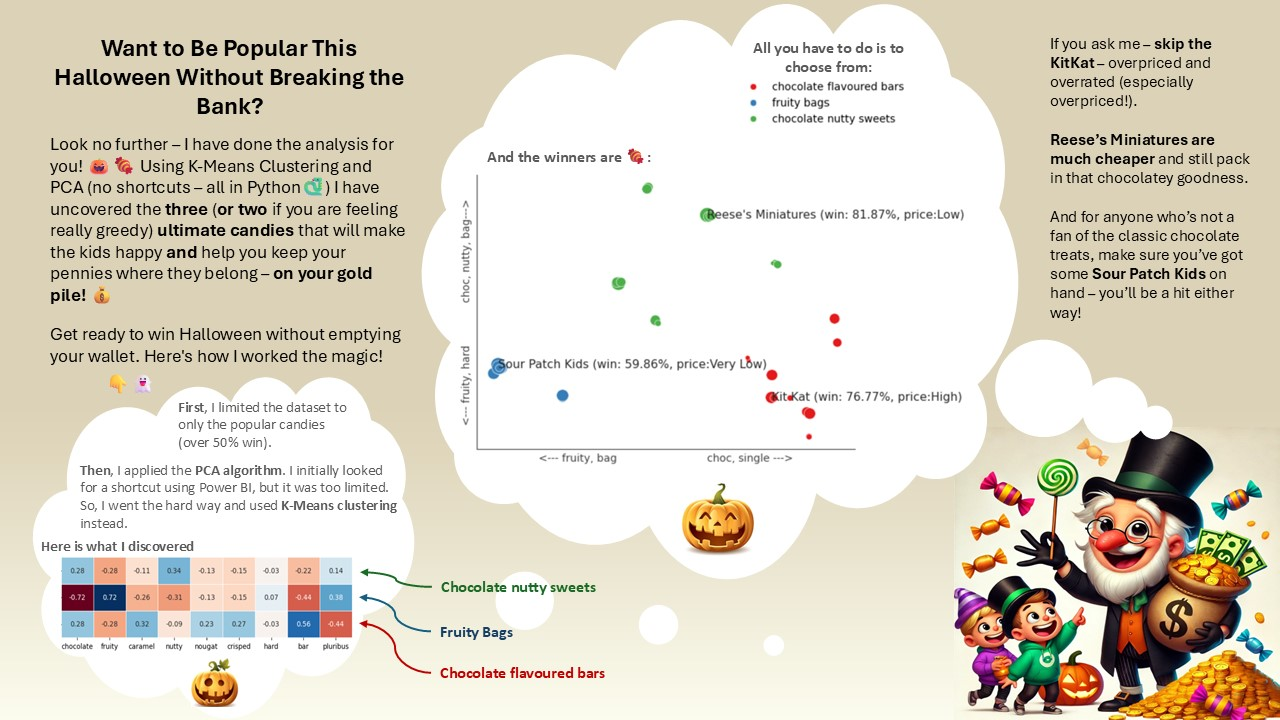